In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [ ]:
import math
import pandas as pd
import tensorflow as tf
import kerastuner.tuners as kt
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  after removing the cwd from sys.path.


In [ ]:
TRAIN_DATA_PATH = '/kaggle/input/california-housing-prices/housing.csv'

TARGET_NAME = 'median_house_value'

data = pd.read_csv(TRAIN_DATA_PATH)
data=data.drop("ocean_proximity", axis=1)

x_train, x_test, y_train, y_test = train_test_split(data.drop(TARGET_NAME, axis=1), data[TARGET_NAME], test_size=0.33, random_state=42)

In [ ]:
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
5088,-118.28,33.98,19.0,883.0,313.0,726.0,277.0,0.9809
17096,-122.23,37.46,33.0,2643.0,464.0,1015.0,427.0,4.2232
5617,-118.26,33.79,42.0,1162.0,264.0,1044.0,241.0,3.5488
20060,-119.26,35.87,24.0,1590.0,390.0,1686.0,372.0,1.6469
895,-121.96,37.54,14.0,5106.0,1207.0,2738.0,1108.0,3.9909


In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def scale_datasets(x_train, x_test):
  """
  Standard Scale test and train data
  """
  standard_scaler = MinMaxScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled
  
x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)



In [ ]:
import tensorflow
class AutoEncodersZ(tensorflow.keras.Model):

  def __init__(self, output_units):

    super().__init__()
    self.encoder = Sequential(
        [
          Dense(32, activation="relu"),
          Dense(16, activation="relu"),
          Dense(7, activation="relu")
        ]
    )

    self.decoder = Sequential(
        [
          Dense(16, activation="relu"),
          Dense(32, activation="relu"),
          Dense(output_units, activation="sigmoid")
        ]
    )

  def call(self, inputs):

    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded

auto_encoder = AutoEncodersZ(len(x_train_scaled.columns))

auto_encoder.compile(
    loss='mae',
    metrics=['mae'],
    optimizer='adam'
)

history = auto_encoder.fit(
    x_train_scaled, 
    x_train_scaled, 
    epochs=15, 
    batch_size=32, 
    validation_data=(x_test_scaled, x_test_scaled)
)


Epoch 1/15
433/433 [==============================] - 3s 3ms/step - loss: 0.0954 - mae: 0.0954 - val_loss: nan - val_mae: nan
Epoch 2/15
433/433 [==============================] - 1s 3ms/step - loss: 0.0281 - mae: 0.0281 - val_loss: nan - val_mae: nan
Epoch 3/15
433/433 [==============================] - 1s 3ms/step - loss: 0.0195 - mae: 0.0195 - val_loss: nan - val_mae: nan
Epoch 4/15
433/433 [==============================] - 1s 3ms/step - loss: 0.0159 - mae: 0.0159 - val_loss: nan - val_mae: nan
Epoch 5/15
433/433 [==============================] - 1s 3ms/step - loss: 0.0148 - mae: 0.0148 - val_loss: nan - val_mae: nan
Epoch 6/15
433/433 [==============================] - 1s 3ms/step - loss: 0.0140 - mae: 0.0140 - val_loss: nan - val_mae: nan
Epoch 7/15
433/433 [==============================] - 1s 3ms/step - loss: 0.0136 - mae: 0.0136 - val_loss: nan - val_mae: nan
Epoch 8/15
433/433 [==============================] - 1s 3ms/step - loss: 0.0132 - mae: 0.0132 - val_loss: nan - val_m

In [ ]:
encoder_layer = auto_encoder.get_layer('sequential_9')
reduced_df = pd.DataFrame(encoder_layer.predict(x_train_scaled))
reduced_df = reduced_df.add_prefix('feature_')

433/433 [==============================] - 1s 1ms/step


In [ ]:
reduced_df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6
0,2.019948,0.539943,0.249304,0.0,0.074842,1.167672,1.007334
1,1.319110,1.315158,0.201463,0.0,0.000000,1.295131,0.763481
2,1.793758,0.997997,0.166512,0.0,0.111388,1.385049,1.542997
3,1.739620,0.773187,0.355349,0.0,0.000000,1.261802,0.863468
4,0.976184,0.806693,0.337698,0.0,0.000000,0.910623,0.287431
...,...,...,...,...,...,...,...
13823,1.603865,0.987634,0.245582,0.0,0.136966,0.938953,1.504014
13824,1.544789,0.619815,0.365031,0.0,0.120341,1.178957,1.256493
13825,1.540475,0.732559,0.228039,0.0,0.079202,1.280595,1.247622
13826,1.071428,1.029045,0.337880,0.0,0.000000,0.767349,0.445765


2. Image denoising

In [ ]:
import numpy 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 1s 0us/step


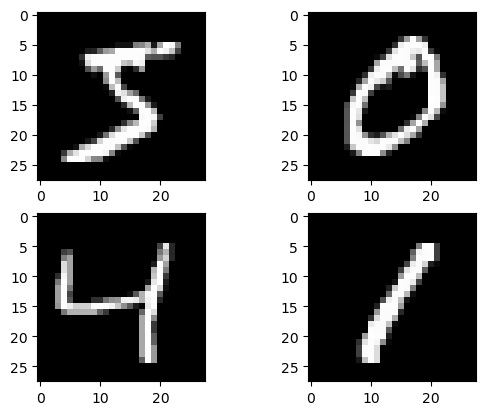

In [ ]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [ ]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
noise_factor = 0.2
x_train_noisy = X_train + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noisy = X_test + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
x_train_noisy = numpy.clip(x_train_noisy, 0., 1.)
x_test_noisy = numpy.clip(x_test_noisy, 0., 1.)

In [ ]:
# create model
model = Sequential()
model.add(Dense(500, input_dim=num_pixels, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(x_train_noisy, X_train, validation_data=(x_test_noisy, X_test), epochs=2, batch_size=200)

Epoch 1/2
300/300 [==============================] - 8s 23ms/step - loss: 0.0408 - val_loss: 0.0191
Epoch 2/2
300/300 [==============================] - 7s 22ms/step - loss: 0.0159 - val_loss: 0.0132


In [ ]:
pred = model.predict(x_test_noisy)
pred.shape

313/313 [==============================] - 1s 3ms/step


(10000, 784)

Test Images


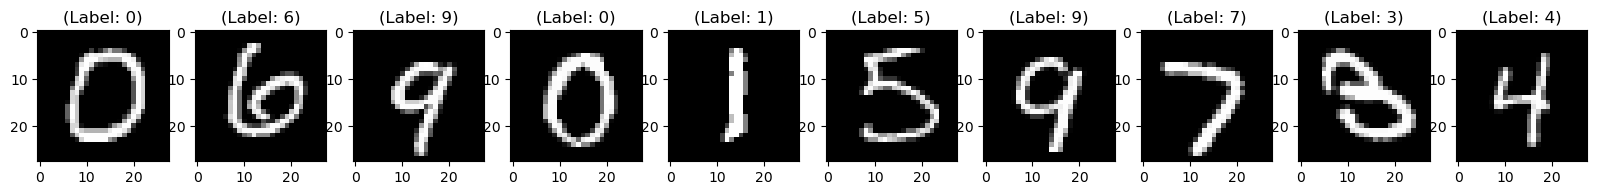

Test Images with Noise


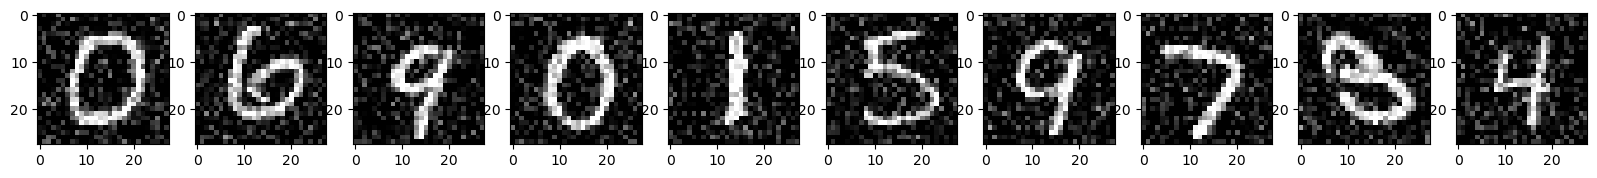

Reconstruction of Noisy Test Images


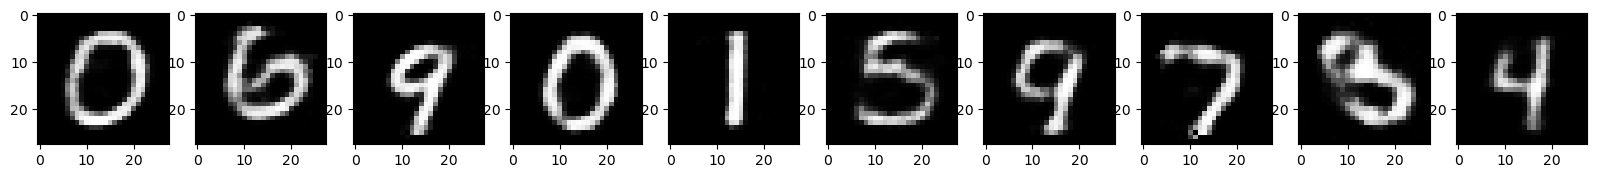

In [ ]:
X_test = numpy.reshape(X_test, (10000,28,28)) *255
pred = numpy.reshape(pred, (10000,28,28)) *255
x_test_noisy = numpy.reshape(x_test_noisy, (-1,28,28)) *255
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i,:,:], cmap='gray')
    curr_lbl = y_test[i]
    plt.title("(Label: " + str(curr_lbl) + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i,:,:], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i,:,:], cmap='gray')  
plt.show()